**Aprenderemos a trabaja con SQL en pandas**

### leer una base de datos de sql server

In [25]:
import pandas as pd
from sqlalchemy import create_engine
import pyodbc

In [26]:

# Parámetros de conexión
server = "UNITY12\RAMSES"          # o la IP de tu servidor
database = "TiendaInformatica"  # tu base de datos
username = "sa"               # tu usuario de SQL Server
password = "12345"            # tu contraseña

# Conexión
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password}"
)

# Leer una tabla con pandas
df = pd.read_sql(" SELECT Cli.NOMBRE AS [Nombre Cliente], Cli.email, P.Nombre as [Nombre Producto],P.Precio,DP.Cantidad,PD.FechaPedido,PD.Estado,D.Direccion,D.CodigoPostal,D.Provincia FROM DetallesPedido DP INNER join Pedidos PD ON DP.IdPedido = PD.IdPedido INNER join Productos P ON DP.IdProducto = P.IdProducto INNER join Clientes Cli on PD.IdCliente = Cli.IdCliente INNER join Direcciones D on PD.IdDireccion = D.IdDireccion", conn, index_col='CodigoPostal')
df

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\monti.UNITY12\AppData\Local\Temp\ipykernel_11668\2450348579.py:2: SyntaxWarning: invalid escape sequence '\R'
  server = "UNITY12\RAMSES"          # o la IP de tu servidor
C:\Users\monti.UNITY12\AppData\Local\Temp\ipykernel_11668\2450348579.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(" SELECT Cli.NOMBRE AS [Nombre Cliente], Cli.email, P.Nombre as [Nombre Producto],P.Precio,DP.Cantidad,PD.FechaPedido,PD.Estado,D.Direccion,D.CodigoPostal,D.Provincia FROM DetallesPedido DP INNER join Pedidos PD ON DP.IdPedido = PD.IdPedido INNER join Productos P ON DP.IdProducto = P.IdProducto INNER join Clientes Cli on PD.IdCliente = Cli.IdCliente INNER join Direcciones D on PD.IdDireccion = D.IdDireccion", conn, inde

,Nombre Cliente,email,Nombre Producto,Precio,Cantidad,FechaPedido,Estado,Direccion,Provincia
CodigoPostal,,,,,,,,,
01000,Juan Pérez,marcos@gmail.com,Laptop HP,12000.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Reforma 123,CDMX
44100,Luis Torres,julieta@gmail.com,Monitor LG,3500.0,2,2025-07-15 22:35:27.020,Enviado,Calle 5 de Mayo 45,Jalisco
03100,Antonio Gil,antonio@gmail.com,Teclado Logitech,1500.0,1,2025-07-15 22:35:27.020,Entregado,Insurgentes Sur 987,CDMX
64000,Rocío Ramírez,rocio@gmail.com,Mouse Razer,1700.0,1,2025-07-15 22:35:27.020,Cancelado,Blvd. Díaz Ordaz 123,Nuevo León
72000,Jorge Méndez,jorge@gmail.com,Impresora Epson,4500.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Universidad 321,Puebla
50000,Elena Salinas,elena@gmail.com,Memoria RAM,800.0,2,2025-07-15 22:35:27.020,Enviado,Carr. Nacional 456,Edomex
77500,Bruno Rivera,bruno@gmail.com,Router TP-Link,900.0,1,2025-07-15 22:35:27.020,Entregado,Morelos 789,Quintana Roo
97000,Valeria Robles,valeria@gmail.com,Windows 11,2800.0,3,2025-07-15 22:35:27.020,Pendiente,Norte 56,Yucatán
45100,Esteban Díaz,esteban@gmail.com,Soporte Monitor,400.0,1,2025-07-15 22:35:27.020,Entregado,Av. Patria 234,Jalisco


In [27]:

#Mostrar las primeras filas 
base = df.head()
base

,Nombre Cliente,email,Nombre Producto,Precio,Cantidad,FechaPedido,Estado,Direccion,Provincia
CodigoPostal,,,,,,,,,
01000,Juan Pérez,marcos@gmail.com,Laptop HP,12000.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Reforma 123,CDMX
44100,Luis Torres,julieta@gmail.com,Monitor LG,3500.0,2,2025-07-15 22:35:27.020,Enviado,Calle 5 de Mayo 45,Jalisco
03100,Antonio Gil,antonio@gmail.com,Teclado Logitech,1500.0,1,2025-07-15 22:35:27.020,Entregado,Insurgentes Sur 987,CDMX
64000,Rocío Ramírez,rocio@gmail.com,Mouse Razer,1700.0,1,2025-07-15 22:35:27.020,Cancelado,Blvd. Díaz Ordaz 123,Nuevo León
72000,Jorge Méndez,jorge@gmail.com,Impresora Epson,4500.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Universidad 321,Puebla


In [28]:
#Leer los ultimos filas
df.tail(2)

,Nombre Cliente,email,Nombre Producto,Precio,Cantidad,FechaPedido,Estado,Direccion,Provincia
CodigoPostal,,,,,,,,,
76000,Santiago Guzmán,santiago@gmail.com,SSD Kingston,1200.0,2,2025-07-15 22:35:27.020,Enviado,Av. Hidalgo 45,Querétaro
78000,Adriana Ortiz,adriana@gmail.com,UPS APC,2500.0,1,2025-07-15 22:35:27.020,Pendiente,Constituyentes 9,SLP


In [29]:
df.describe() #Ver la descripcion

,Precio,Cantidad,FechaPedido
count,12.000000,12.000000,12
mean,5983.333333,1.416667,2025-07-15 22:35:27.020000
min,400.000000,1.000000,2025-07-15 22:35:27.020000
25%,1125.000000,1.000000,2025-07-15 22:35:27.020000
50%,2100.000000,1.000000,2025-07-15 22:35:27.020000
75%,3750.000000,2.000000,2025-07-15 22:35:27.020000
max,40000.000000,3.000000,2025-07-15 22:35:27.020000
std,11156.639551,0.668558,NaN


In [30]:
#Mostrar el tipo de datos
df.dtypes

Nombre Cliente             object
email                      object
Nombre Producto            object
Precio                    float64
Cantidad                    int64
FechaPedido        datetime64[ns]
Estado                     object
Direccion                  object
Provincia                  object
dtype: object

In [31]:
df.info()#Ver la informacion

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 01000 to 78000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre Cliente   12 non-null     object        
 1   email            12 non-null     object        
 2   Nombre Producto  12 non-null     object        
 3   Precio           12 non-null     float64       
 4   Cantidad         12 non-null     int64         
 5   FechaPedido      12 non-null     datetime64[ns]
 6   Estado           12 non-null     object        
 7   Direccion        12 non-null     object        
 8   Provincia        12 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 960.0+ bytes


In [32]:
df['email'] #Ver solo el email

CodigoPostal
01000      marcos@gmail.com
44100     julieta@gmail.com
03100     antonio@gmail.com
64000       rocio@gmail.com
72000       jorge@gmail.com
50000       elena@gmail.com
77500       bruno@gmail.com
97000     valeria@gmail.com
45100     esteban@gmail.com
31000       diana@gmail.com
76000    santiago@gmail.com
78000     adriana@gmail.com
Name: email, dtype: object

In [33]:
#Mostrar el listado de columnas
df.columns

Index(['Nombre Cliente', 'email', 'Nombre Producto', 'Precio', 'Cantidad',
       'FechaPedido', 'Estado', 'Direccion', 'Provincia'],
      dtype='object')

In [34]:
#Cantidad de filas y columnas
df.shape

(12, 9)

In [35]:
#ver el tamaño
df.size

108

In [36]:
#Eliminar duplicados
duplicado = df.drop_duplicates()
duplicado

,Nombre Cliente,email,Nombre Producto,Precio,Cantidad,FechaPedido,Estado,Direccion,Provincia
CodigoPostal,,,,,,,,,
01000,Juan Pérez,marcos@gmail.com,Laptop HP,12000.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Reforma 123,CDMX
44100,Luis Torres,julieta@gmail.com,Monitor LG,3500.0,2,2025-07-15 22:35:27.020,Enviado,Calle 5 de Mayo 45,Jalisco
03100,Antonio Gil,antonio@gmail.com,Teclado Logitech,1500.0,1,2025-07-15 22:35:27.020,Entregado,Insurgentes Sur 987,CDMX
64000,Rocío Ramírez,rocio@gmail.com,Mouse Razer,1700.0,1,2025-07-15 22:35:27.020,Cancelado,Blvd. Díaz Ordaz 123,Nuevo León
72000,Jorge Méndez,jorge@gmail.com,Impresora Epson,4500.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Universidad 321,Puebla
50000,Elena Salinas,elena@gmail.com,Memoria RAM,800.0,2,2025-07-15 22:35:27.020,Enviado,Carr. Nacional 456,Edomex
77500,Bruno Rivera,bruno@gmail.com,Router TP-Link,900.0,1,2025-07-15 22:35:27.020,Entregado,Morelos 789,Quintana Roo
97000,Valeria Robles,valeria@gmail.com,Windows 11,2800.0,3,2025-07-15 22:35:27.020,Pendiente,Norte 56,Yucatán
45100,Esteban Díaz,esteban@gmail.com,Soporte Monitor,400.0,1,2025-07-15 22:35:27.020,Entregado,Av. Patria 234,Jalisco


In [37]:
valor_null = df.isnull().sum()
valor_null

Nombre Cliente     0
email              0
Nombre Producto    0
Precio             0
Cantidad           0
FechaPedido        0
Estado             0
Direccion          0
Provincia          0
dtype: int64

In [38]:
#renombrar columnas
ren = df.rename(columns={'email':'correo'})
ren

,Nombre Cliente,correo,Nombre Producto,Precio,Cantidad,FechaPedido,Estado,Direccion,Provincia
CodigoPostal,,,,,,,,,
01000,Juan Pérez,marcos@gmail.com,Laptop HP,12000.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Reforma 123,CDMX
44100,Luis Torres,julieta@gmail.com,Monitor LG,3500.0,2,2025-07-15 22:35:27.020,Enviado,Calle 5 de Mayo 45,Jalisco
03100,Antonio Gil,antonio@gmail.com,Teclado Logitech,1500.0,1,2025-07-15 22:35:27.020,Entregado,Insurgentes Sur 987,CDMX
64000,Rocío Ramírez,rocio@gmail.com,Mouse Razer,1700.0,1,2025-07-15 22:35:27.020,Cancelado,Blvd. Díaz Ordaz 123,Nuevo León
72000,Jorge Méndez,jorge@gmail.com,Impresora Epson,4500.0,1,2025-07-15 22:35:27.020,Pendiente,Av. Universidad 321,Puebla
50000,Elena Salinas,elena@gmail.com,Memoria RAM,800.0,2,2025-07-15 22:35:27.020,Enviado,Carr. Nacional 456,Edomex
77500,Bruno Rivera,bruno@gmail.com,Router TP-Link,900.0,1,2025-07-15 22:35:27.020,Entregado,Morelos 789,Quintana Roo
97000,Valeria Robles,valeria@gmail.com,Windows 11,2800.0,3,2025-07-15 22:35:27.020,Pendiente,Norte 56,Yucatán
45100,Esteban Díaz,esteban@gmail.com,Soporte Monitor,400.0,1,2025-07-15 22:35:27.020,Entregado,Av. Patria 234,Jalisco


In [39]:
#Agrupar datos
grupo1 = ren.groupby('Estado')['Precio'].sum().reset_index()
grupo1

,Estado,Precio
0,Cancelado,41700.0
1,Entregado,2800.0
2,Enviado,5500.0
3,Pendiente,21800.0


In [40]:
#Tabla dinamica
tabla1 = pd.pivot_table(ren, index='Estado', values='Precio', aggfunc='mean')
tabla1

,Precio
Estado,
Cancelado,20850.000000
Entregado,933.333333
Enviado,1833.333333
Pendiente,5450.000000


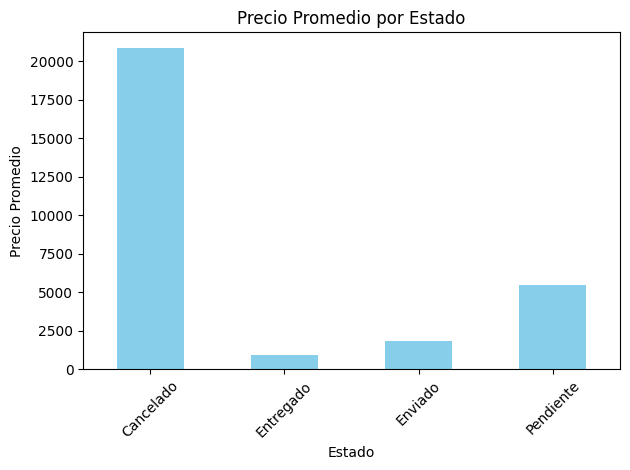

In [41]:
import matplotlib.pyplot as plt
tabla1.plot(kind='bar', legend=False, color='skyblue')
plt.title('Precio Promedio por Estado')
plt.xlabel('Estado')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()       # Ajusta el gráfico para que no se corten las etiquetas
plt.show()

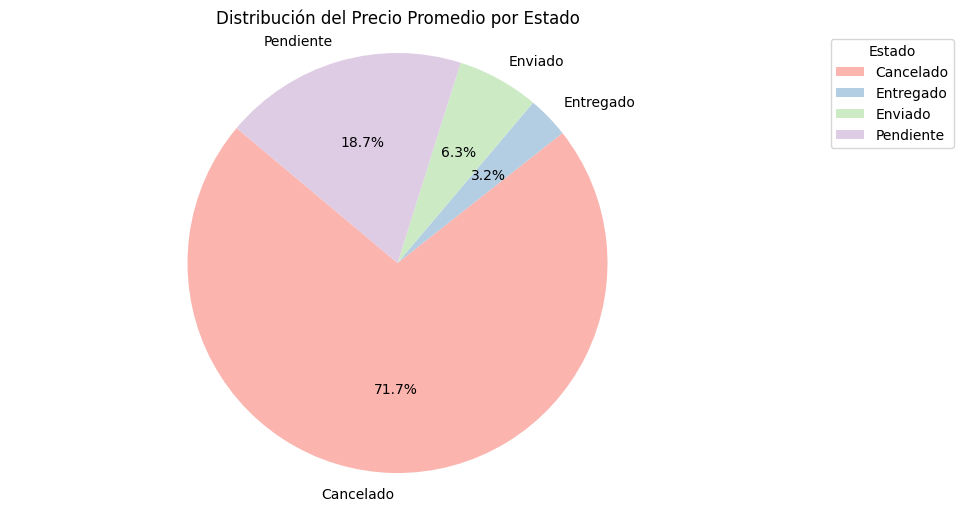

In [42]:
# Gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(tabla1['Precio'], labels=tabla1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribución del Precio Promedio por Estado')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1) , loc='upper left')
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.show()

In [43]:
#Forma 2 de conectar sql server
#import pandas as pd
from sqlalchemy import create_engine

# Datos de conexión
server = "localhost"          # Cambia si es otra IP o nombre de servidor
database = "TiendaInformatica"
username = "sa"
password = "12345"

# Crear engine de sqlalchemy
engine = create_engine(
    f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
)


In [44]:
query = """
SELECT
    Cli.NOMBRE AS [Nombre Cliente],
    Cli.email,
    P.Nombre AS [Nombre Producto],
    P.Precio,
    DP.Cantidad,
    PD.FechaPedido,
    PD.Estado,	
    D.Direccion,
    D.CodigoPostal,
    D.Provincia
FROM DetallesPedido DP
INNER JOIN Pedidos PD ON DP.IdPedido = PD.IdPedido
INNER JOIN Productos P ON DP.IdProducto = P.IdProducto
INNER JOIN Clientes Cli ON PD.IdCliente = Cli.IdCliente
INNER JOIN Direcciones D ON PD.IdDireccion = D.IdDireccion
"""


In [45]:
# Ejecutar la consulta y guardar en un DataFrame
df_pedidos = pd.read_sql(query, engine)

# Mostrar los primeros registros
df_pedidos


OperationalError: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 17 for SQL Server]Proveedor de canalizaciones con nombre: No se pudo abrir una conexión con SQL Server [2].  (2) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 17 for SQL Server]Ha finalizado el tiempo de espera de inicio de sesión (0); [08001] [Microsoft][ODBC Driver 17 for SQL Server]Error relacionado con la red o específico de instancia al establecer conexión con el servidor SQL Server. El servidor no se encuentra o no está accesible. Compruebe si el nombre de la instancia es correcto y si SQL Server está configurado para permitir conexiones remotas. Para obtener más información, vea los Libros en pantalla de SQL Server. (2)')
(Background on this error at: https://sqlalche.me/e/20/e3q8)